# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

1. load CSV 
2. info 
3. column 
4. describe 
5. Cleaning: isna 
6. EDA: pair wise plot 
7. split data to training and testing 
8. instantiate model 
9. cross validate score
10. hypter-parameter tuning 
11. visualize the tree 

In [2]:
df = pd.read_csv('GermanCredit.csv')
df.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [3]:
# Looks like the columm Class is the label. The Dtype is object / string. Convert it to 0/1 
# print(df.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Duration                                1000 non-null   int64 
 1   Amount                                  1000 non-null   int64 
 2   InstallmentRatePercentage               1000 non-null   int64 
 3   ResidenceDuration                       1000 non-null   int64 
 4   Age                                     1000 non-null   int64 
 5   NumberExistingCredits                   1000 non-null   int64 
 6   NumberPeopleMaintenance                 1000 non-null   int64 
 7   Telephone                               1000 non-null   int64 
 8   ForeignWorker                           1000 non-null   int64 
 9   Class                                   1000 non-null   object
 10  CheckingAccountStatus.lt.0              1000 non-null   int64 
 11  Check

In [4]:
# Change the Class Good to 1 and Bad to 0 
df['Class'] = df.Class.map({'Good':1, 'Bad':0})

In [5]:
df.describe()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.596000,0.963000,0.700000,...,0.13900,0.047000,0.814000,0.179000,0.713000,0.108000,0.022000,0.2000,0.630000,0.148000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.490943,0.188856,0.458487,...,0.34612,0.211745,0.389301,0.383544,0.452588,0.310536,0.146757,0.4002,0.483046,0.355278
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000


In [6]:
# The Class columns is not described if it is a string 
len(df.describe().columns)

62

In [7]:
df.isna().sum().sort_values(ascending=False).head()

Duration                              0
OtherDebtorsGuarantors.CoApplicant    0
SavingsAccountBonds.gt.1000           0
SavingsAccountBonds.Unknown           0
EmploymentDuration.lt.1               0
dtype: int64

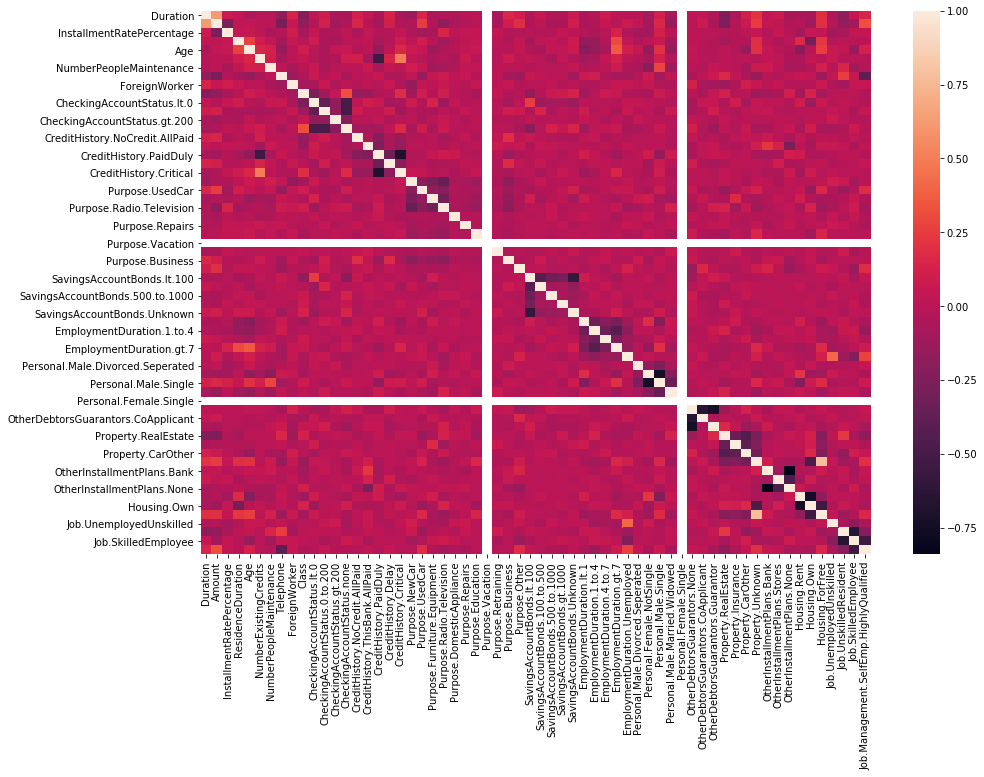

In [8]:
fig, ax = plt.subplots(figsize=(15, 10))
tc = df.corr()
sns.heatmap(tc, ax=ax)
plt.show()

In [9]:
df_labels = df['Class']

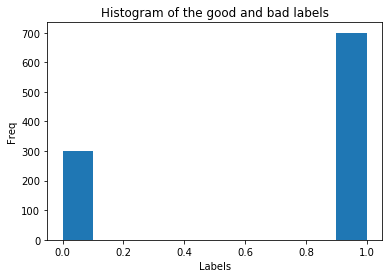

In [10]:
plt.hist(df_labels)
plt.xlabel('Labels')
plt.ylabel('Freq')
plt.title('Histogram of the good and bad labels')
plt.show()

In [11]:
df_woClass = df.drop(columns=['Class'])
df_woClass.columns

Index(['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration',
       'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone',
       'ForeignWorker', 'CheckingAccountStatus.lt.0',
       'CheckingAccountStatus.0.to.200', 'CheckingAccountStatus.gt.200',
       'CheckingAccountStatus.none', 'CreditHistory.NoCredit.AllPaid',
       'CreditHistory.ThisBank.AllPaid', 'CreditHistory.PaidDuly',
       'CreditHistory.Delay', 'CreditHistory.Critical', 'Purpose.NewCar',
       'Purpose.UsedCar', 'Purpose.Furniture.Equipment',
       'Purpose.Radio.Television', 'Purpose.DomesticAppliance',
       'Purpose.Repairs', 'Purpose.Education', 'Purpose.Vacation',
       'Purpose.Retraining', 'Purpose.Business', 'Purpose.Other',
       'SavingsAccountBonds.lt.100', 'SavingsAccountBonds.100.to.500',
       'SavingsAccountBonds.500.to.1000', 'SavingsAccountBonds.gt.1000',
       'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1',
       'EmploymentDuration.1.to.4', 'Emp

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_woClass, df_labels, test_size=0.3, random_state=5)

In [13]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

700
300
700
300


              precision    recall  f1-score   support

           0       0.43      0.38      0.40        91
           1       0.74      0.78      0.76       209

    accuracy                           0.66       300
   macro avg       0.58      0.58      0.58       300
weighted avg       0.65      0.66      0.65       300



[Text(681.332,1003.02,'X[12] <= 0.5\ngini = 0.429\nsamples = 700\nvalue = [218, 482]'),
 Text(431.396,820.65,'X[0] <= 20.5\ngini = 0.491\nsamples = 426\nvalue = [185, 241]'),
 Text(219.122,638.283,'X[0] <= 11.5\ngini = 0.435\nsamples = 228\nvalue = [73, 155]'),
 Text(109.561,455.917,'X[50] <= 0.5\ngini = 0.278\nsamples = 66\nvalue = [11, 55]'),
 Text(54.7805,273.55,'X[40] <= 0.5\ngini = 0.209\nsamples = 59\nvalue = [7, 52]'),
 Text(27.3902,91.1833,'gini = 0.089\nsamples = 43\nvalue = [2, 41]'),
 Text(82.1707,91.1833,'gini = 0.43\nsamples = 16\nvalue = [5, 11]'),
 Text(164.341,273.55,'X[38] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(136.951,91.1833,'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(191.732,91.1833,'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(328.683,455.917,'X[1] <= 954.5\ngini = 0.472\nsamples = 162\nvalue = [62, 100]'),
 Text(273.902,273.55,'X[1] <= 625.5\ngini = 0.393\nsamples = 26\nvalue = [19, 7]'),
 Text(246.512,91.1833,'gini = 0.0\nsamples = 5

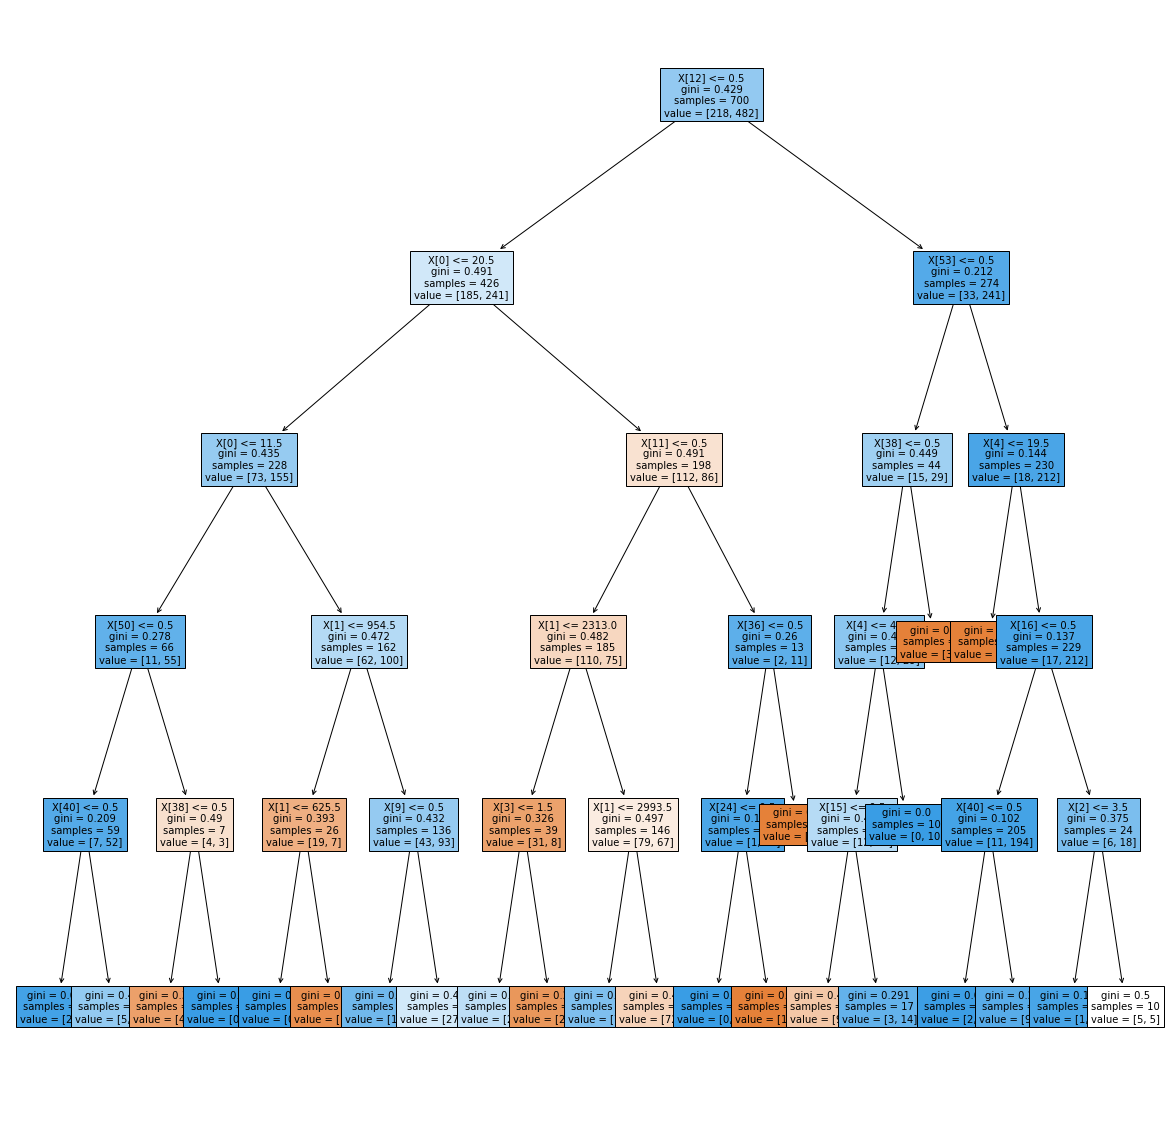

In [14]:
clf_dt = DecisionTreeClassifier(max_depth=5)
clf_dt.fit(X_train, y_train)
print(classification_report(clf_dt.predict(X_test), y_test))
plt.figure(figsize=(20,20))
tree.plot_tree(clf_dt, filled=True, fontsize=10)

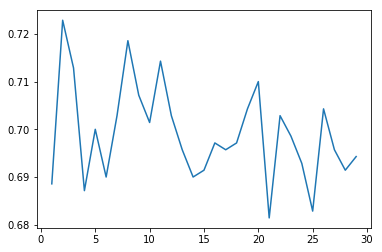

In [15]:
max_depth_array = range(1, 30, 1)
score_array = []
for md in max_depth_array:
    clf_dt = DecisionTreeClassifier(max_depth=md)
    score_array.append(np.average(cross_val_score(clf_dt, X_train, y_train, cv=10)))

plt.plot(max_depth_array, score_array)

/home/joseph/anaconda3/envs/mec-miniprojects/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/joseph/anaconda3/envs/mec-miniprojects/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/joseph/anaconda3/envs/mec-miniprojects/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/joseph/anaconda3/envs/mec-miniprojects/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 285, in fit
    "or larger than 1").format(max_leaf_nodes))
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
/home/joseph/anaconda3/envs/mec-miniprojects/lib/python3.7/site-packages/sklearn/model_selection/_vali

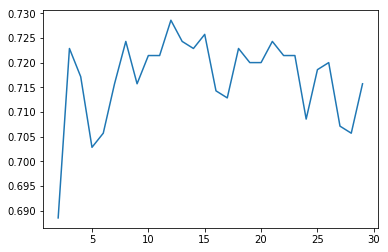

In [16]:
max_leaf_nodes_array = range(1, 30, 1)
score_array = []
for md in max_leaf_nodes_array:
    clf_dt = DecisionTreeClassifier(max_leaf_nodes=md)
    score_array.append(np.average(cross_val_score(clf_dt, X_train, y_train, cv=10)))

plt.plot(max_leaf_nodes_array, score_array)

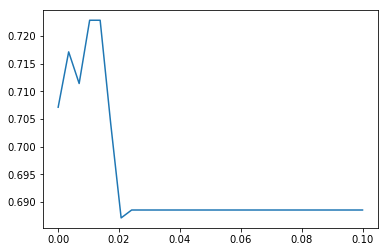

In [17]:
min_impurity_decrease_array = np.linspace(0, 0.1, 30)
score_array = []
for md in min_impurity_decrease_array:
    clf_dt = DecisionTreeClassifier(min_impurity_decrease=md)
    score_array.append(np.average(cross_val_score(clf_dt, X_train, y_train, cv=10)))

plt.plot(min_impurity_decrease_array, score_array)


In [18]:
# param_grid = dict(min_impurity_decrease = np.linspace(0, 0.1, 30), max_leaf_nodes = [1, 2, 3, 4, 5])
# param_grid = dict(min_impurity_decrease = np.linspace(0, 0.1, 30), max_depth = [1, 2, 3, 4, 5])
# param_grid = dict(min_samples_split = [1, 2, 3, 4, 5])
# param_grid = dict(criterion = ['gini', 'entropy', 'log_loss'])
param_grid = dict(criterion = ['gini', 'entropy'], min_samples_split = [2, 3, 4, 5], min_impurity_decrease = np.linspace(0, 0.1, 30))
param_grid

{'criterion': ['gini', 'entropy'],
 'min_samples_split': [2, 3, 4, 5],
 'min_impurity_decrease': array([0.        , 0.00344828, 0.00689655, 0.01034483, 0.0137931 ,
        0.01724138, 0.02068966, 0.02413793, 0.02758621, 0.03103448,
        0.03448276, 0.03793103, 0.04137931, 0.04482759, 0.04827586,
        0.05172414, 0.05517241, 0.05862069, 0.06206897, 0.06551724,
        0.06896552, 0.07241379, 0.07586207, 0.07931034, 0.08275862,
        0.0862069 , 0.08965517, 0.09310345, 0.09655172, 0.1       ])}

In [19]:
from sklearn.model_selection import GridSearchCV 
clf_dt = DecisionTreeClassifier()
grid = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv=10, n_jobs=1)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_params_)
print(accuracy_score(grid.predict(X_test), y_test))

0.7228571428571429 {'criterion': 'gini', 'min_impurity_decrease': 0.010344827586206898, 'min_samples_split': 2}
0.6866666666666666


              precision    recall  f1-score   support

           0       0.39      0.42      0.41        76
           1       0.80      0.78      0.79       224

    accuracy                           0.69       300
   macro avg       0.59      0.60      0.60       300
weighted avg       0.69      0.69      0.69       300



[Text(673.8,911.833,'X[12] <= 0.5\ngini = 0.429\nsamples = 700\nvalue = [218, 482]'),
 Text(449.2,547.1,'X[0] <= 20.5\ngini = 0.491\nsamples = 426\nvalue = [185, 241]'),
 Text(224.6,182.367,'gini = 0.435\nsamples = 228\nvalue = [73, 155]'),
 Text(673.8,182.367,'gini = 0.491\nsamples = 198\nvalue = [112, 86]'),
 Text(898.4,547.1,'gini = 0.212\nsamples = 274\nvalue = [33, 241]')]

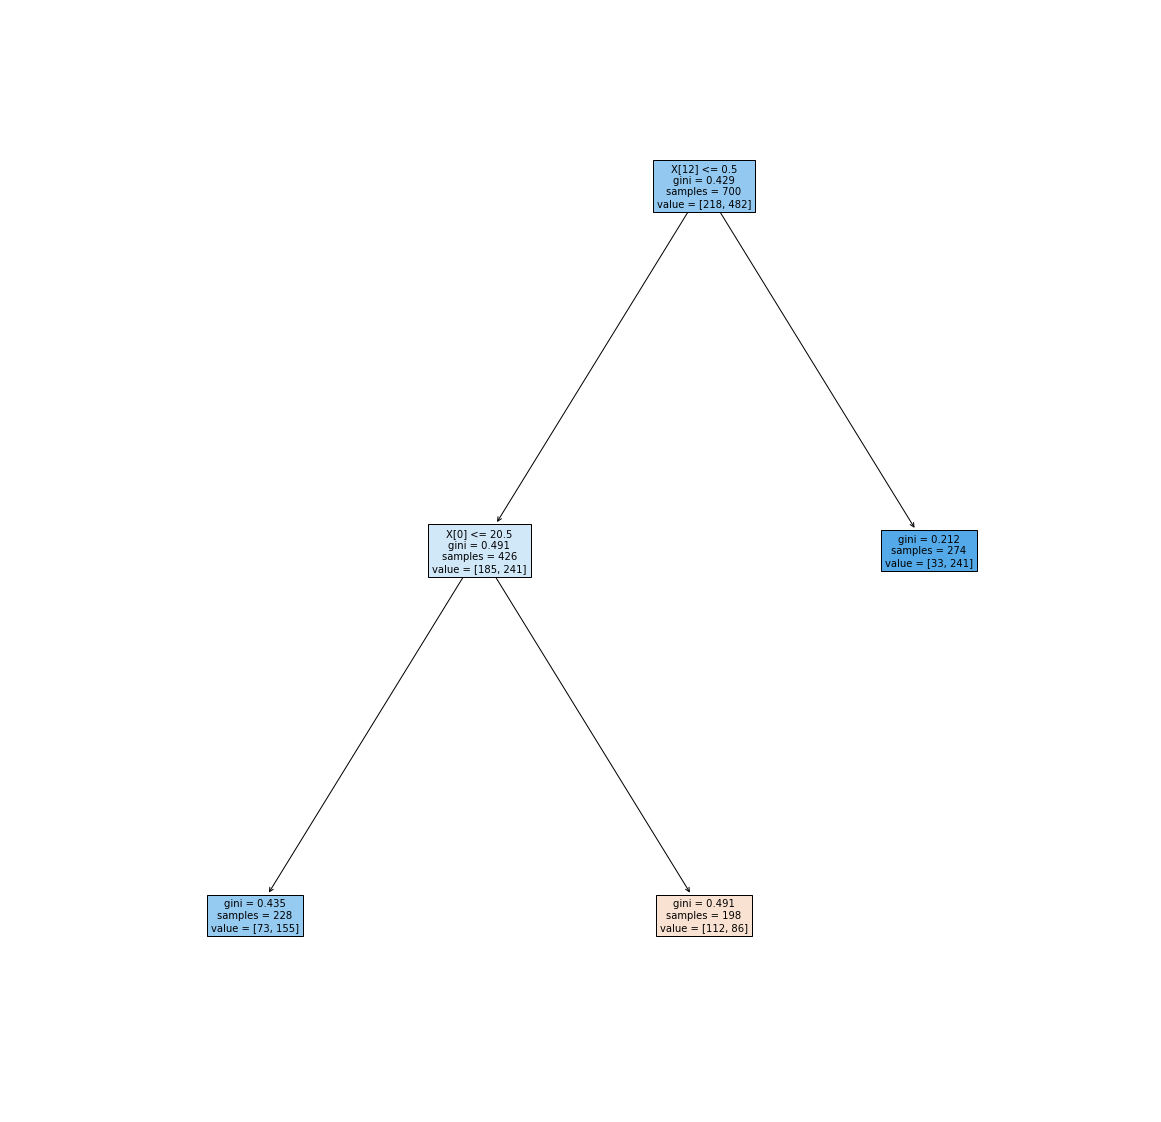

In [20]:
clf_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_impurity_decrease=0.01)
clf_dt.fit(X_train, y_train)
print(classification_report(clf_dt.predict(X_test), y_test))
plt.figure(figsize=(20,20))
tree.plot_tree(clf_dt, filled=True, fontsize=10)


### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [21]:
! pip install dtreeviz

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

In [22]:
import dtreeviz

              precision    recall  f1-score   support

           0       0.35      0.43      0.39        68
           1       0.82      0.77      0.80       232

    accuracy                           0.69       300
   macro avg       0.59      0.60      0.59       300
weighted avg       0.72      0.69      0.70       300



[Text(561.5,957.425,'X[12] <= 0.5\ngini = 0.429\nsamples = 700\nvalue = [218, 482]'),
 Text(280.75,683.875,'X[0] <= 20.5\ngini = 0.491\nsamples = 426\nvalue = [185, 241]'),
 Text(140.375,410.325,'X[0] <= 11.5\ngini = 0.435\nsamples = 228\nvalue = [73, 155]'),
 Text(70.1875,136.775,'gini = 0.278\nsamples = 66\nvalue = [11, 55]'),
 Text(210.562,136.775,'gini = 0.472\nsamples = 162\nvalue = [62, 100]'),
 Text(421.125,410.325,'X[11] <= 0.5\ngini = 0.491\nsamples = 198\nvalue = [112, 86]'),
 Text(350.938,136.775,'gini = 0.482\nsamples = 185\nvalue = [110, 75]'),
 Text(491.312,136.775,'gini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(842.25,683.875,'X[53] <= 0.5\ngini = 0.212\nsamples = 274\nvalue = [33, 241]'),
 Text(701.875,410.325,'X[38] <= 0.5\ngini = 0.449\nsamples = 44\nvalue = [15, 29]'),
 Text(631.688,136.775,'gini = 0.414\nsamples = 41\nvalue = [12, 29]'),
 Text(772.062,136.775,'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(982.625,410.325,'X[4] <= 19.5\ngini = 0.144\nsamples 

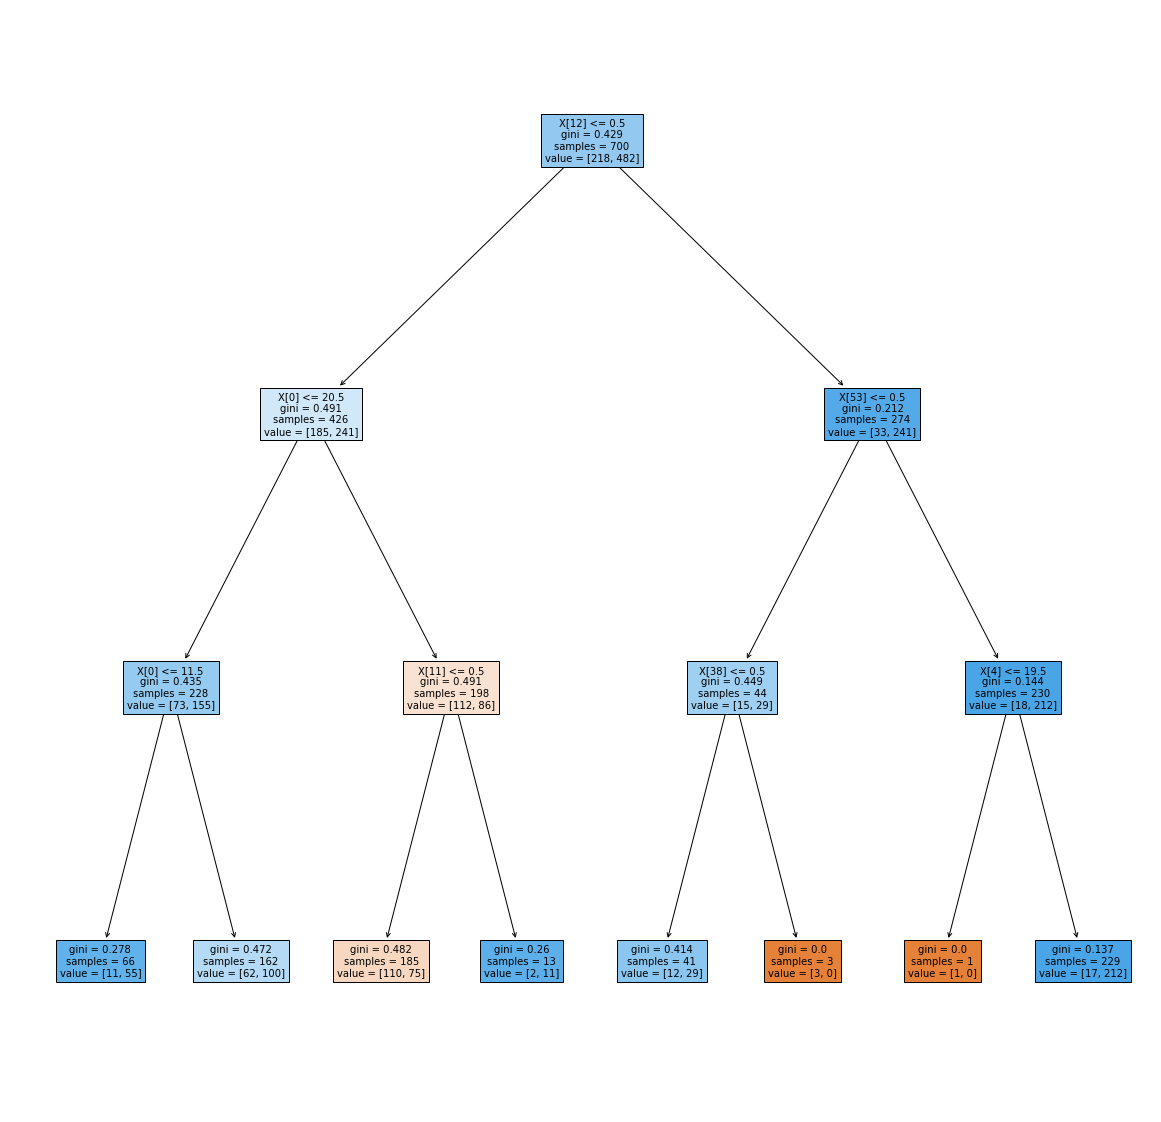

In [23]:
clf_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_impurity_decrease=0.00, max_depth=3)
clf_dt.fit(X_train, y_train)
print(classification_report(clf_dt.predict(X_test), y_test))
plt.figure(figsize=(20,20))
tree.plot_tree(clf_dt, filled=True, fontsize=10)

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

/home/joseph/anaconda3/envs/mec-miniprojects/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
/home/joseph/anaconda3/envs/mec-miniprojects/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/joseph/anaconda3/envs/mec-miniprojects/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2082: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/joseph/anaconda3/envs/mec-miniprojects/lib/python3.7/site-p

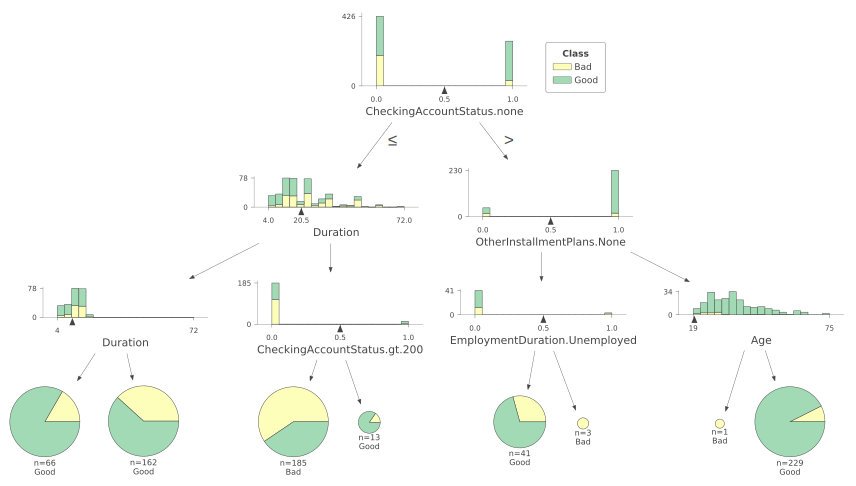

In [24]:
viz_model = dtreeviz.model(clf_dt, X_train=X_train, y_train=y_train, feature_names=X_train.columns, target_name='Class', class_names=['Bad', 'Good'])
viz_model.view(scale=1.2)

/home/joseph/anaconda3/envs/mec-miniprojects/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
/home/joseph/anaconda3/envs/mec-miniprojects/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/joseph/anaconda3/envs/mec-miniprojects/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2082: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


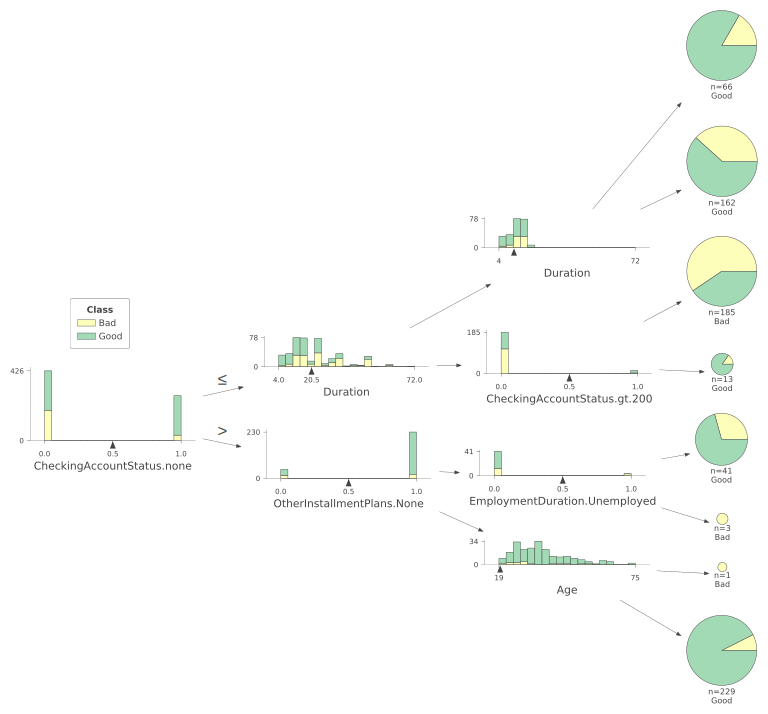

In [25]:
viz_model.view(orientation='LR', scale=1.2)

In [26]:
x = X_test.iloc[0]
x

Duration                                    12
Amount                                    1255
InstallmentRatePercentage                    4
ResidenceDuration                            4
Age                                         61
                                          ... 
Housing.ForFree                              0
Job.UnemployedUnskilled                      0
Job.UnskilledResident                        1
Job.SkilledEmployee                          0
Job.Management.SelfEmp.HighlyQualified       0
Name: 544, Length: 61, dtype: int64

/home/joseph/anaconda3/envs/mec-miniprojects/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
/home/joseph/anaconda3/envs/mec-miniprojects/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/joseph/anaconda3/envs/mec-miniprojects/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2082: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


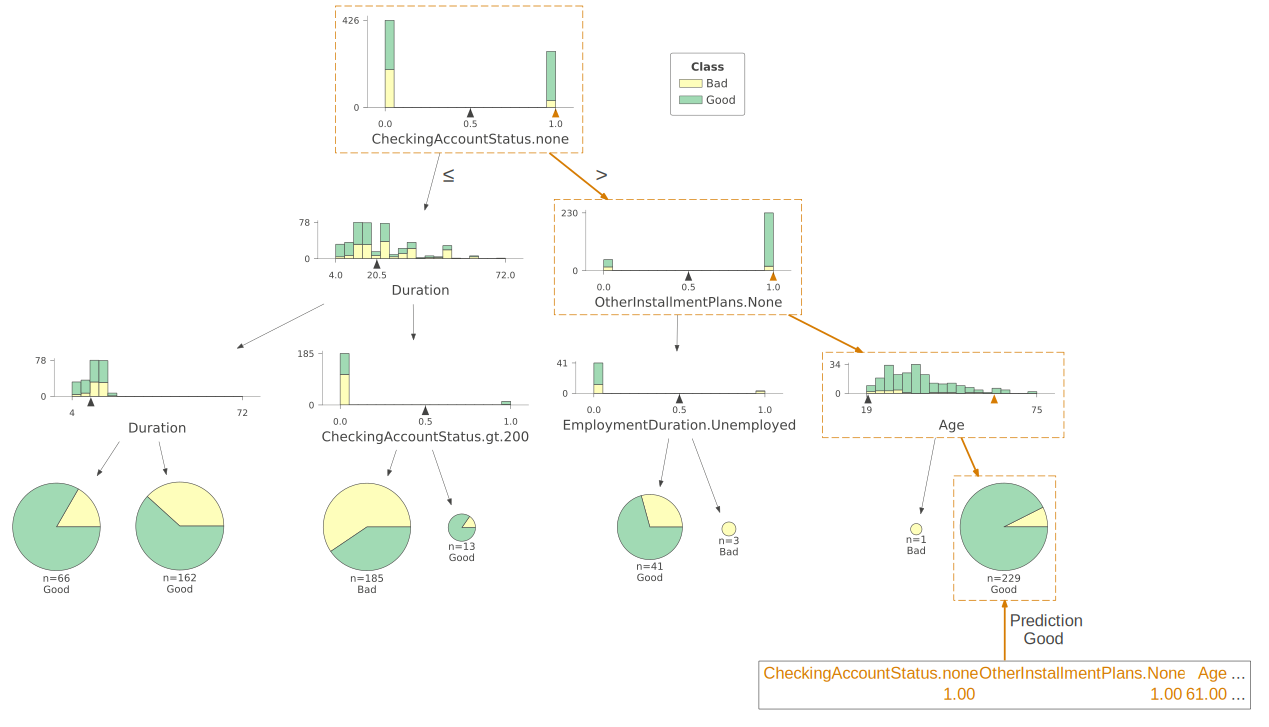

In [27]:
viz_model.view(x=x, scale=1.5)

In [28]:
# Need to convert Series to numpy array and then reshape 
clf_dt.predict(np.array(x).reshape(1,-1))

array([1])

/home/joseph/anaconda3/envs/mec-miniprojects/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
/home/joseph/anaconda3/envs/mec-miniprojects/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/joseph/anaconda3/envs/mec-miniprojects/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2082: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


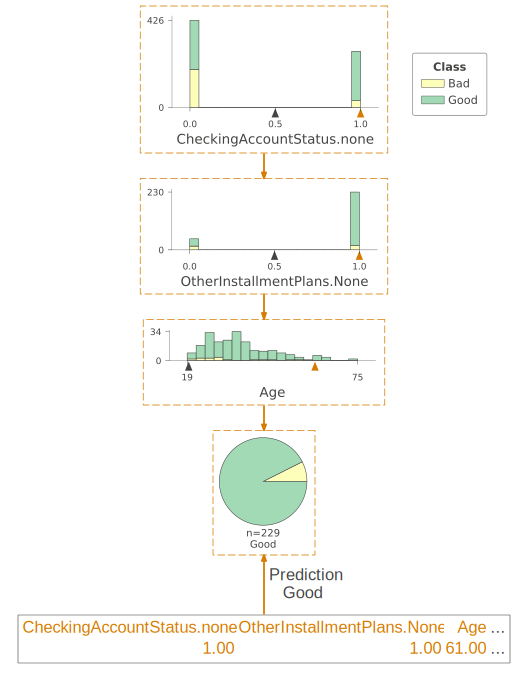

In [29]:
viz_model.view(x=x, show_just_path=True, scale=1.5)

In [30]:
print(viz_model.explain_prediction_path(x))

19.5 <= Age 
0.5 <= CheckingAccountStatus.none 
0.5 <= OtherInstallmentPlans.None 



/home/joseph/anaconda3/envs/mec-miniprojects/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans


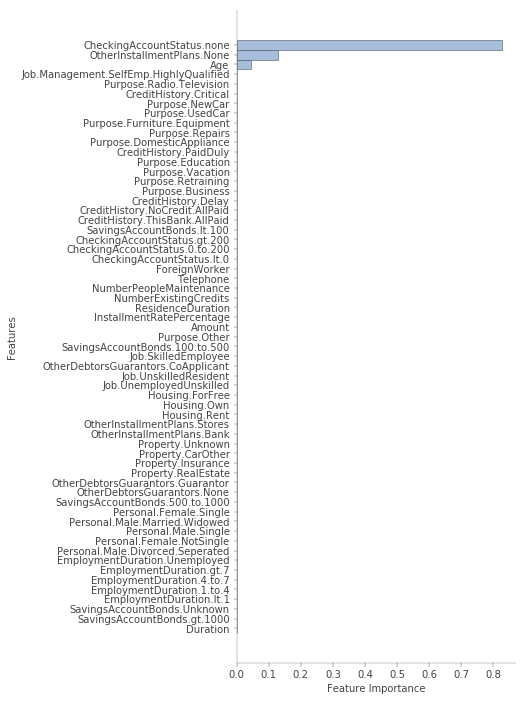

In [31]:
viz_model.instance_feature_importance(x, figsize=(5, 12))

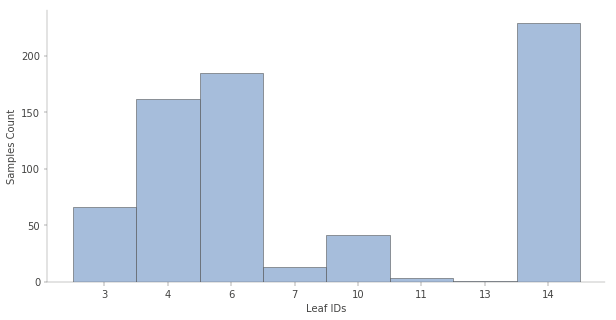

In [32]:
viz_model.leaf_sizes(figsize=(10, 5))

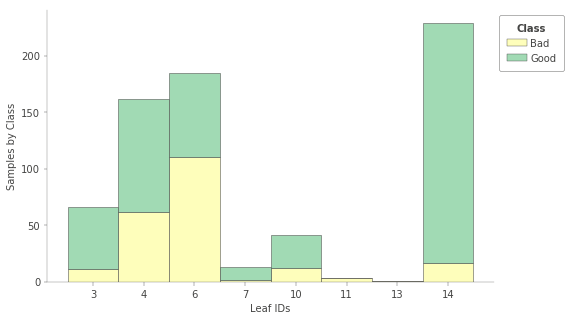

In [33]:
viz_model.ctree_leaf_distributions(figsize=(8, 5))

In [34]:
viz_model.node_stats(node_id = 6)

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,...,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,33.108108,5195.383784,3.000000,2.913514,34.945946,1.356757,1.151351,0.562162,0.983784,0.502703,...,0.156757,0.059459,0.783784,0.172973,0.627027,0.200000,0.005405,0.151351,0.616216,0.227027
std,10.679582,3712.735873,1.118034,1.138783,11.557385,0.553909,0.359364,0.497467,0.126649,0.501350,...,0.364558,0.237124,0.412781,0.379250,0.484907,0.401085,0.073521,0.359364,0.487626,0.420047
min,21.000000,915.000000,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2384.000000,2.000000,2.000000,26.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,3965.000000,3.000000,3.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,39.000000,6967.000000,4.000000,4.000000,41.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/home/joseph/anaconda3/envs/mec-miniprojects/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans


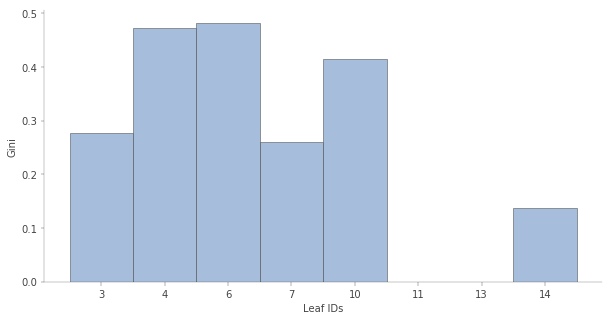

In [35]:
viz_model.leaf_purity(figsize=(10,5))

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from matplotlib import pyplot as plt

In [37]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
print(classification_report(clf_rf.predict(X_test), y_test))
plt.figure(figsize=(20,20))

              precision    recall  f1-score   support

           0       0.39      0.67      0.49        48
           1       0.93      0.80      0.86       252

    accuracy                           0.78       300
   macro avg       0.66      0.73      0.68       300
weighted avg       0.84      0.78      0.80       300



<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [38]:
print(clf_rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


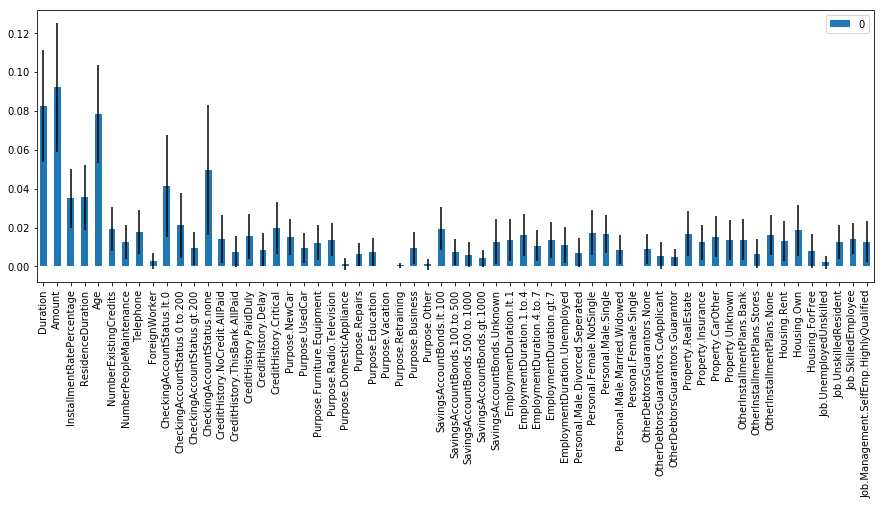

In [39]:
# feature names 
# print(X_train.columns)

# There are many trees in a rf. The feature_importances_ is the mean of the feature_importances_ of all the trees 
importances = clf_rf.feature_importances_ 
# print(f'feature_importances_ = \n{y_feature_importances_}')

# Calculate the std of the feature_importances_
std_importances_ = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)
# print(f'std_feature_importances_ = \n{std_feature_importances_}')

# pd.DataFrame(data=importances, columns=X_train.columns)
pd_rf = pd.DataFrame(data=importances, index=X_train.columns)

fig, ax = plt.subplots(figsize=(15,5))
pd_rf.plot.bar(yerr=std_importances_, ax=ax)

### <b> Hyperparameter Tunning: RandomizedsearchCV

In [40]:
n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]
max_features = ['auto', 'sqrt']
max_depth    = [int(x) for x in np.linspace(10, 110, 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf  = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap':bootstrap
}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [41]:
clf_rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=clf_rf, param_distributions=random_grid, n_iter=20, cv=3, verbose=1, random_state=42)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   44.9s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [42]:
print(rf_random.best_score_)
pprint(rf_random.best_params_)
print(accuracy_score(rf_random.best_estimator_.predict(X_test), y_test))

0.7485968966655662
{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1000}
0.7566666666666667


In [43]:
# clf_rf = RandomForestClassifier()
# grid = GridSearchCV(estimator = clf_rf, param_grid = random_grid, cv=3, verbose = 2)
# grid.fit(X_test, y_test)

As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

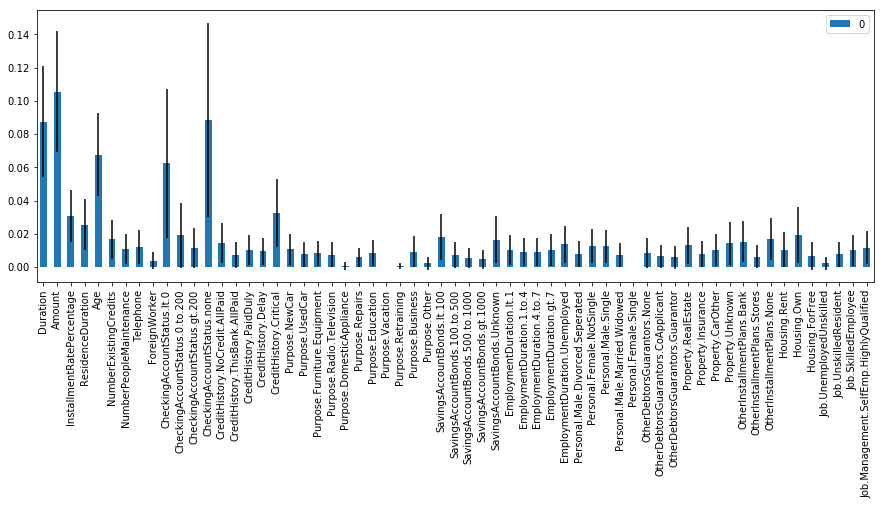

In [44]:
# There are many trees in a rf. The feature_importances_ is the mean of the feature_importances_ of all the trees 
importances = rf_random.best_estimator_.feature_importances_

# Calculate the std of the feature_importances_
std_importances = np.std([tree.feature_importances_ for tree in rf_random.best_estimator_.estimators_], axis=0)

pd_rf = pd.DataFrame(data=importances, index=X_train.columns)

fig, ax = plt.subplots(figsize=(15,5))
pd_rf.plot.bar(yerr=std_importances, ax=ax)

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [45]:
! pip install pdpbox

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

In [46]:
# from mpl_toolkits.mplot3d import Axes3D

from sklearn.ensemble.partial_dependence import plot_partial_dependence
# from sklearn.ensemble.partial_dependence import partial_dependence
# from sklearn.externals.joblib import dump
# from sklearn.externals.joblib import load

# test pdpbox
import pdpbox
from pdpbox import pdp
from pdpbox import info_plots, get_dataset

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

In [47]:
clf_rf = rf_random.best_estimator_

In [48]:
# test_titanic = get_dataset.titanic()
# titanic_data = test_titanic['data']
# titanic_target = test_titanic['target']
# fig, axes, summary_df = info_plots.target_plot(
#     df=titanic_data, feature='Sex', feature_name='Sex', target=titanic_target)
# test_titanic['data'][test_titanic['data']['Sex']==0].count()
# # test_titanic['data']

(<Figure size 1080x648 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f906b6ba1d0>,
  'bar_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f906a99f050>,
  'line_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f905f7997d0>},
    x display_column  value_lower  value_upper  count     Class
 0  0         [4, 9)          4.0          9.0     94  0.893617
 1  1        [9, 12)          9.0         12.0     86  0.802326
 2  2       [12, 18)         12.0         18.0    253  0.750988
 3  3       [18, 21)         18.0         21.0    121  0.644628
 4  4       [21, 24)         21.0         24.0     32  0.718750
 5  5       [24, 27)         24.0         27.0    185  0.697297
 6  6       [27, 36)         27.0         36.0     59  0.661017
 7  7       [36, 72]         36.0         72.0    170  0.517647)

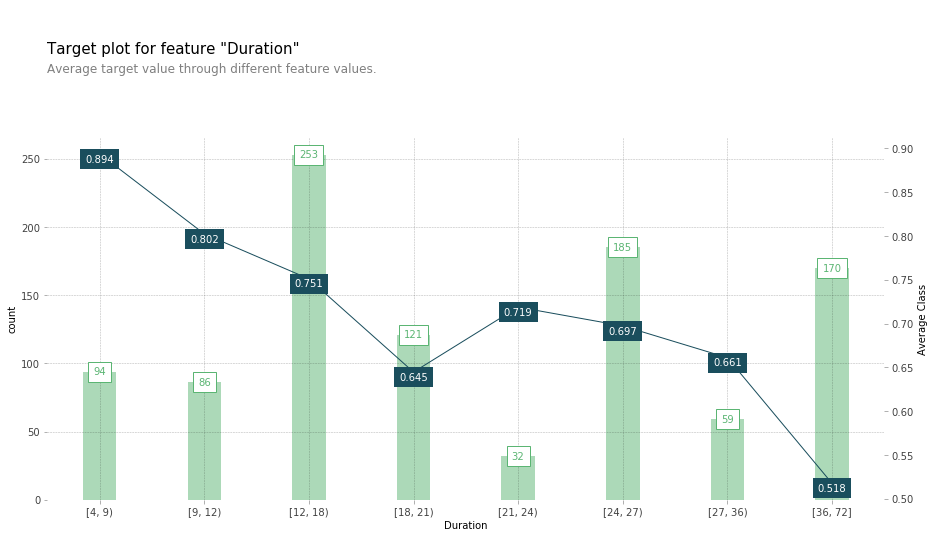

In [49]:
info_plots.target_plot(df=df, feature='Duration', feature_name='Duration', target='Class')

(<Figure size 1080x648 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f904c2d0d90>,
  'bar_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f905f739590>,
  'line_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f904c32ac90>},
    x    display_column  value_lower  value_upper  count     Class
 0  0        [250, 976)        250.0        976.0    111  0.675676
 1  1       [976, 1300)        976.0       1300.0    111  0.702703
 2  2      [1300, 1554)       1300.0       1554.0    111  0.765766
 3  3      [1554, 2064)       1554.0       2064.0    111  0.747748
 4  4      [2064, 2606)       2064.0       2606.0    111  0.729730
 5  5    [2606, 3368.0)       2606.0       3368.0    111  0.765766
 6  6  [3368.0, 4370.0)       3368.0       4370.0    111  0.738739
 7  7    [4370.0, 6842)       4370.0       6842.0    111  0.657658
 8  8     [6842, 18424]       6842.0      18424.0    112  0.517857)

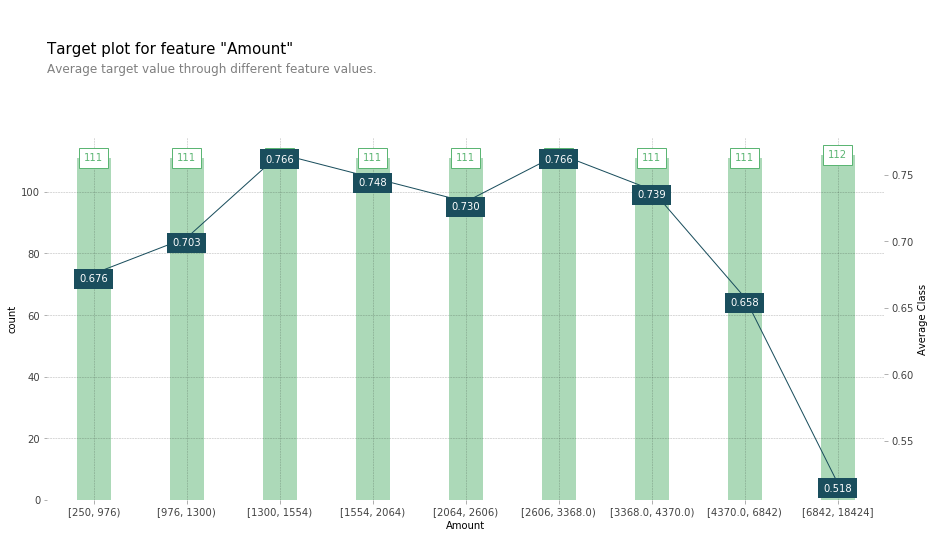

In [50]:
info_plots.target_plot(df=df, feature='Amount', feature_name='Amount', target='Class')

(<Figure size 1080x648 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f905e4e9990>,
  'box_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f905e4c0f10>,
  'bar_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f904c28b2d0>},
    x      display_column  value_lower   value_upper  count  \
 0  0      [338, 1026.67)   338.000000   1026.666667     78   
 1  1  [1026.67, 1316.67)  1026.666667   1316.666667     78   
 2  2   [1316.67, 1568.0)  1316.666667   1568.000000     77   
 3  3   [1568.0, 2117.33)  1568.000000   2117.333333     78   
 4  4  [2117.33, 2586.67)  2117.333333   2586.666667     78   
 5  5   [2586.67, 3398.0)  2586.666667   3398.000000     77   
 6  6      [3398.0, 4609)  3398.000000   4609.000000     78   
 7  7      [4609, 7330.0)  4609.000000   7330.000000     78   
 8  8     [7330.0, 18424]  7330.000000  18424.000000     78   
 
    actual_prediction_q1  actual_prediction_q2  actual_prediction_q3  
 0              0.327329              0.8445

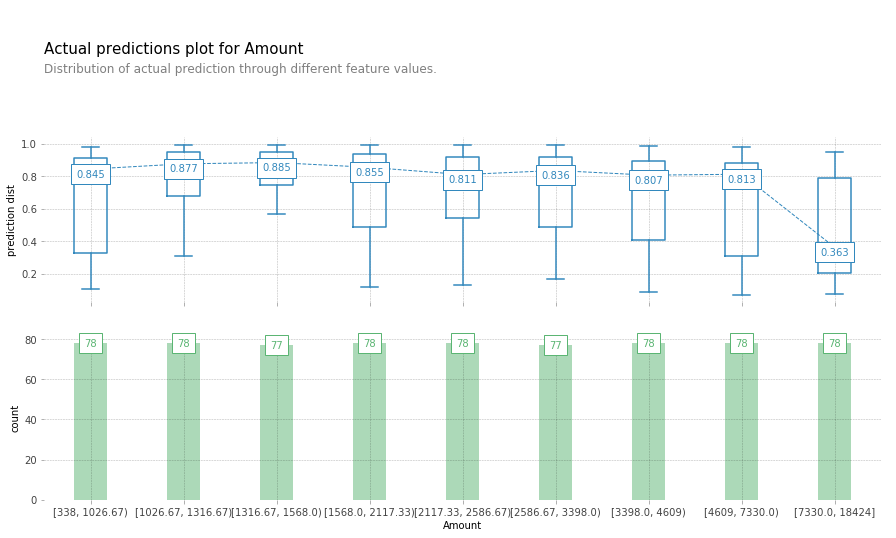

In [63]:
info_plots.actual_plot(clf_rf, X_train, 'Amount', 'Amount')

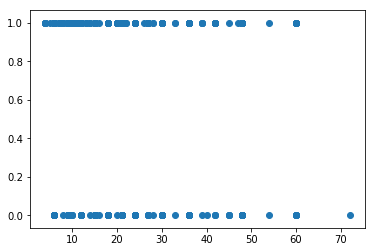

In [51]:
plt.scatter(df.Duration, df.Class)

(<Figure size 576x576 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f904cdb55d0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f904ccdb1d0>})

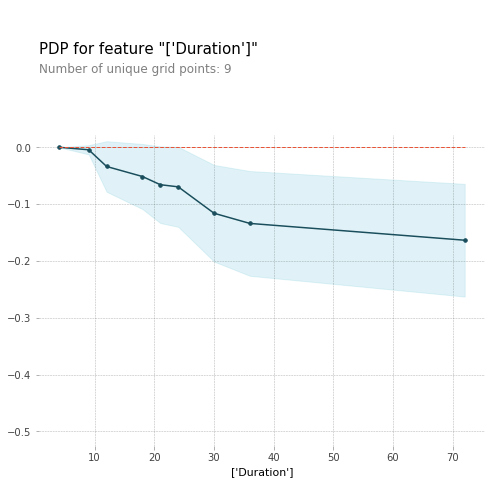

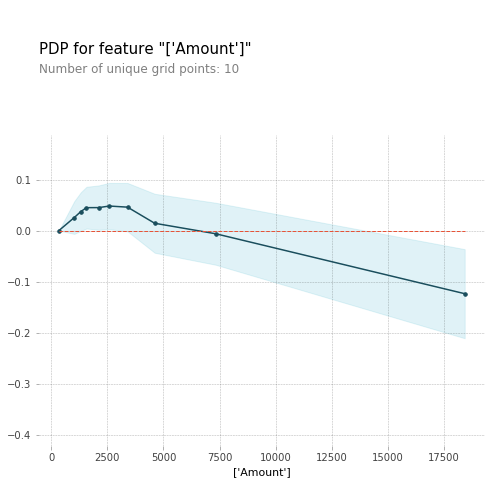

In [77]:
pdp_Dura = pdp.pdp_isolate(clf_rf, X_train, X_train.columns, 'Duration' )
pdp.pdp_plot(pdp_Dura, ['Duration'], figsize=(8,8))
pdp_Dura = pdp.pdp_isolate(clf_rf, X_train, X_train.columns, 'Amount' )
pdp.pdp_plot(pdp_Dura, ['Amount'], figsize=(8,8))

In [52]:
pdp_Dura_Amou = pdp.pdp_interact(clf_rf, X_train, X_train.columns, ['Duration','Amount'] )

(<Figure size 864x864 with 5 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f0041214cd0>,
  'pdp_inter_ax': {'_pdp_x_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f00411d5290>,
   '_pdp_y_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f0041181a10>,
   '_pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f00411b7290>}})

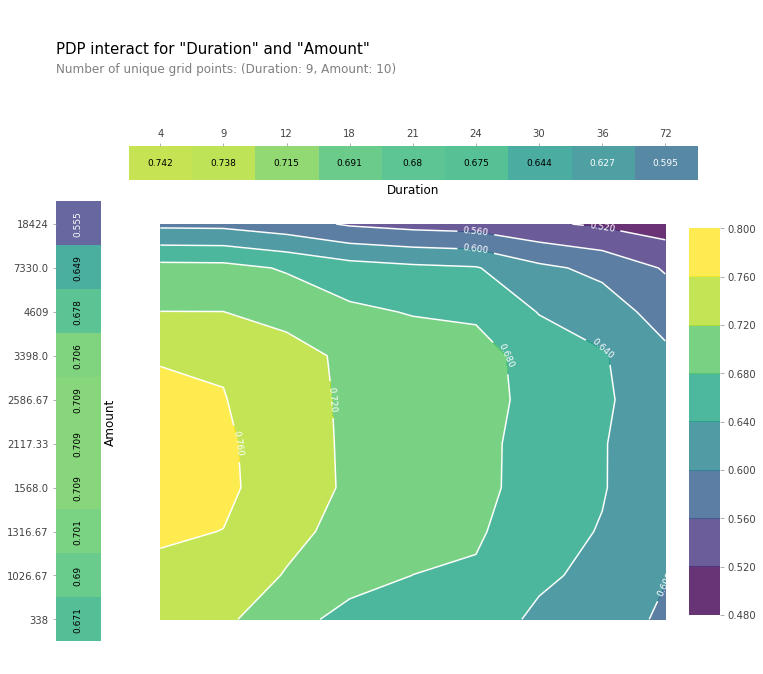

In [74]:
# pdp.pdp_interact_plot(pdp_Dura_Amou, ['Duration','Amount'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5)
pdp.pdp_interact_plot(pdp_Dura_Amou, ['Duration','Amount'], plot_pdp=True, figsize=(12,12))

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [ ]:
! conda install -c anaconda py-xgboost

In [ ]:
! conda install -c conda-forge catboost

In [ ]:
! conda install -c conda-forge lightgbm

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)